# fb testing

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys
import pickle
import dask as pd
import pandas as pd_old
import warnings
import utils
import heartpy as hp
from ECG_feature_extractor_1001 import *
# import time 
import time
from datetime import datetime
from biosppy.signals import ecg
from feature_extraction import SubjectData, compute_features, get_samples, combine_files

# To ignore all warnings:
warnings.filterwarnings("ignore", module="numpy")

In [ ]:
WINDOW_IN_SECONDS = 60
stride = 1
label_dict = {'baseline': 1, 'stress': 2, 'amusement': 0}
int_to_label = {1: 'baseline', 2: 'stress', 0: 'amusement'}
feat_names = None
loadPath = '../data/WESAD'
savePath = '../data/GN-WESAD'
subject_feature_path = '/subject_feats'

n_samples = 10
subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
snrs = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6]  # 0.00001,
fb_model_list = ['DT', 'RF', 'LDA', 'KNN', 'AdaBoost', 'SVM']

if not os.path.exists(savePath):
    os.makedirs(savePath)
if not os.path.exists(savePath + subject_feature_path):
    os.makedirs(savePath + subject_feature_path)

In [ ]:
def get_processing_status(snrs, subject_ids, onedrive, n_samples=10):
    # bads are the ones that do not have the gaussian-modified data.
    bads = []
    bad_snrs = []
    bad_subjects = []
    bad_ns = []
    completed_snrs = []
    for n_i in range(n_samples):
        for snr in snrs:
            for subject_id in subject_ids:
                # print(snr)

                # print(f'{onedrive}/n_{n_i}/snr_{snr}/S{subject_id}/{a}')
                try:
                    a = os.listdir(f'{onedrive}/n_{n_i}/snr_{str(snr)}/S{subject_id}')
                    a[0]
                    completed_snrs.append(snr)
                except:
                    bads.append(f'n_{n_i}/snr_{snr}/S{subject_id}')
                    bad_snrs.append(snr)
                    bad_subjects.append(subject_id)
                    bad_ns.append(n_i)

    bad_snrs = sorted(set(bad_snrs))
    bad_subjects = sorted(set(bad_subjects))
    bad_ns = sorted(set(bad_ns))
    completed_snrs = sorted(set(completed_snrs))
    # printing after checking
    print(f'completed snrs :{completed_snrs}')
    print(f'incomplete snrs :{bad_snrs}')


get_processing_status(snrs, subject_ids, onedrive, n_samples=n_samples)

In [ ]:
model_results = {}

for each_dataset in dataset_list:
    for snr in snrs:
        for model in fb_model_list:
            pass

In [ ]:
import os

savePath = 'C:/Users/alkurdi/Downloads/WESAD/GN-WESAD'
n_samples = [9]
subject_ids = [2]
snrs = [0.01]
for n_i in n_samples:
    if not os.path.exists(savePath + '/n_' + str(n_i)):
        os.makedirs(savePath + '/n_' + str(n_i))
    for snr in snrs:
        if not os.path.exists(savePath + '/n_' + str(n_i) + '/snr_' + str(snr)):
            os.makedirs(savePath + '/n_' + str(n_i) + '/snr_' + str(snr))
        for subject_id in subject_ids:
            if not os.path.exists(
                savePath
                + '/n_'
                + str(n_i)
                + '/snr_'
                + str(snr)
                + '/S'
                + str(subject_id)
            ):
                os.makedirs(
                    savePath
                    + '/n_'
                    + str(n_i)
                    + '/snr_'
                    + str(snr)
                    + '/S'
                    + str(subject_id)
                )

In [ ]:
print(f'{savePath}/n_{n_i}')
print(os.path.isdir(f'{savePath}/n_{n_i}'))
print(os.listdir(f'{savePath}/n_{n_i}'))
print(
    os.path.isdir(
        f'{savePath}/n_{n_i}/snr_{snr}/fixed_resampled140hz_S{subject_id}.pkl'
    )
)

with open(f'{savePath}/n_{n_i}/poop.txt', 'w') as f:
    f.write('poop')

In [ ]:
results_table = pd_old.DataFrame(columns=['SNR', 'Accuracy', 'F1-Score', 'dataset'])
results_table.loc[str('SVM')] = pd_old.Series(
    {'SNR': 1, 'Accuracy': 5, 'F1 Score': 2, 'dataset': 'WESAD'}
)
results_table.loc[str('RF')] = pd_old.Series(
    {'SNR': 1, 'Accuracy': 5, 'F1 Score': 2, 'dataset': 'WESAD'}
)
'''
fb_model_list = ['SVM', 'RF']
for model in fb_model_list:
    for i in range(len(snrs)):
        results_table.loc[str(model) + str(snrs[i])] = pd.Series({'SNR':snrs[i], 'Accuracy':svm_accuracy[i], 'F1 Score':2, 'dataset':'WESAD'})
'''
display(results_table)

In [ ]:
start = time.time()

ecg_biosppy = ecg
ecg = None
fs_ecg = 700
fs_ppg = 64
subject_id = 2

In [ ]:
subject = SubjectData(main_path=loadPath, subject_number=subject_id)
data_dict = subject.get_wrist_and_chest_data()

In [ ]:
now = time.time()
BS_signal_analysis3, pack3, ecg_out3 = analyze_ecg(ecg, fs_ecg)
print('analyze_ecg execution time is ', now - time.time())

In [ ]:
# testing for PPG

now = datetime.now()
pack, ppg, RR, time_dict = freq_ratio(ppg, fs_ppg, method='welch', factor=1)
print('freq_ratio execution time is ', now - time.time())

now = datetime.now()
pack, ppg, time_dict = freq_ratio_hybrid(ppg, fs_ppg, method='welch', factor=1)
print('freq_ratio_hybrid execution time is ', now - time.time())

now = datetime.now()
BS_signal_analysis, pack, ppg_out = analyze_ecg(ppg, fs_ppg)
print('analyze_ecg execution time is ', now - time.time())

now = datetime.now()
wd, m = hp.process(ppg, fs_ppg)
print('hp.process execution time is ', now - time.time())

now = datetime.now()
pack, ppg, RR = freq_ratio_fast(ppg, fs_ppg, method='welch', factor=1)
print('freq_ratio_fast execution time is ', now - time.time())

In [ ]:
combine_noiZ_files(subject_ids)
# took 19m 30s to run

In [ ]:
import pandas as pd
import os
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor
import logging

now = datetime.now().strftime('%Y-%m-%d')


def process_subject_file(snr, n_i, s):
    file_path = f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/S{s}_feats.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, index_col=0)
        df['subject'] = s
        return df
    return None


def combine_noiZ_files(subjects):
    now = datetime.now().strftime('%Y-%m-%d')
    logging.basicConfig(
        level=logging.INFO, filename=now + '-combine.log', filemode='w', force=True
    )

    for snr in snrs:
        for n_i in range(n_samples):
            # Parallelize file reading
            with ThreadPoolExecutor(max_workers=10) as executor:
                futures = [
                    executor.submit(process_subject_file, snr, n_i, s) for s in subjects
                ]
                df_list = [
                    future.result() for future in futures if future.result() is not None
                ]

            if df_list:
                df = pd.concat(df_list)
                df['label'] = df[['0', '1', '2']].idxmax(axis=1)
                df.drop(['0', '1', '2'], axis=1, inplace=True)
                df.reset_index(drop=True, inplace=True)

                df.to_csv(
                    f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/{now}_feats_filt.csv'
                )
                logging.info('-' * 20)
                logging.info(
                    f'Saved file to: {savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/{now}_feats_filt.csv'
                )

                counts = df['label'].value_counts()
                logging.info('Number of samples per class:')
                logging.info(
                    'baseline: {0[1]}; stress: {1[1]}; amusement: {2[1]} '.format(
                        *list(zip(counts.index, counts.values))
                    )
                )
    logging.info('all done!')

In [ ]:
n_i = 5
s = 2
snr = 0.6
df = pd_old.read_csv(
    f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/S{subject_id}_feats.csv',
    index_col=0,
)
df['subject'] = s
# df_list.append(df)
# f = pd_old.concat(df_list)
df['label'] = (df['0'].astype(str) + df['1'].astype(str) + df['2'].astype(str)).apply(
    lambda x: x.index('1')
)
df.drop(['0', '1', '2'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

counts = df['label'].value_counts()
print('Number of samples per class:')
print(
    'baseline: {0[1]}; stress: {1[1]}; amusement: {2[1]} '.format(
        *list(zip(counts.index, counts.values))
    )
)

In [ ]:
def read_n_reduce(path):
    # print(os.listdir(path))
    df = pd_old.read_csv(path, index_col=0)
    print('len of df ', len(df))
    pd_old.set_option('display.max_columns', None)
    # We want to drop columns in df that are not in RADWear to match modalities.
    # drop _c columns
    columns_list = df.columns.tolist()
    drop_list = []
    # df.drop(columns=['Resp_C'])
    for column in columns_list:
        if (
            'EMG' in column
            or 'EDA_C' in column
            or 'Temp_C' in column
            or 'TEMP_C' in column
            or 'SCR_C' in column
            or 'SCL_C' in column
        ):
            drop_list.append(column)

    reduced_df = df.drop(columns=drop_list)
    df = reduced_df
    print('len of reduced df ', len(df))
    return df


def gn_wesad_path(n_i, snr):
    loadPath = '../data/GN-WESAD'
    return (
        f'{loadPath}/n_{n_i}/snr_{snr}{subject_feature_path}/{gn_wesad_day}_feats2.csv'
    )


gn_wesad_day = '2023-11-13'
matrix = np.zeros((len(snrs), n_samples))

for n_i in range(n_samples):
    for i, snr in enumerate(snrs):
        print(f'for {n_i} and {snr} number {i}: ')
        file_path = gn_wesad_path(n_i, snr)
        df = read_n_reduce(file_path)
        matrix[i][n_i] = len(df)

In [ ]:
'data/GN-WESAD/n_0/snr_0.0001/subject_feats/2023-11-12_feats_filt.csv'
'data/GN-WESAD/n_0/snr_0.001/subject_feats/2023-11-12_feats_filt.csv'
loadPath = '../data/GN-WESAD'
# display(os.listdir(f'{loadPath}/n_{n_i}/snr_{snr}{subject_feature_path}'))
snr0001 = pd_old.read_csv(
    '../data/GN-WESAD/n_0/snr_0.0001/subject_feats/2023-11-13_feats2.csv', index_col=0
)
snr001 = pd_old.read_csv(
    '../data/GN-WESAD/n_0/snr_0.001/subject_feats/2023-11-13_feats2.csv', index_col=0
)

In [ ]:
df = pd.DataFrame(
    {
        'SNR': [0.6] * 10,
        'Accuracy': [
            0.940639,
            0.968134,
            0.964939,
            0.940909,
            0.937785,
            0.923780,
            0.942337,
            0.960486,
            0.952816,
            0.925645,
        ],
        'F1 Score': [
            0.940639,
            0.968134,
            0.964939,
            0.940909,
            0.937785,
            0.923780,
            0.942337,
            0.960486,
            0.952816,
            0.925645,
        ],
        'dataset': ['GN-WESAD'] * 10,
        'n_i': list(range(10)),
        'n': [10] * 10,
        'noise gen function': ['Gaussian Noise'] * 10,
        'Precision': [
            0.940639,
            0.968134,
            0.964939,
            0.940909,
            0.937785,
            0.923780,
            0.942337,
            0.960486,
            0.952816,
            0.925645,
        ],
        'Recall': [
            0.940639,
            0.968134,
            0.964939,
            0.940909,
            0.937785,
            0.923780,
            0.942337,
            0.960486,
            0.952816,
            0.925645,
        ],
        'Model': ['DT'] * 10,
    }
)
series = pd.Series(
    {
        'SNR': 0.600000,
        'Accuracy': 0.945747,
        'F1 Score': 0.945747,
        'n_i': 4.500000,
        'n': 10.000000,
        'Precision': 0.945747,
        'Recall': 0.945747,
    },
    name='SNR 0.6 Model DT mean',
)

print(set(df.columns))
print(set(series.index))
missing_columns = set(df.columns) - set(series.index)
print(missing_columns)
for col in missing_columns:
    # You can assign a specific value or use a value from the DataFrame
    # Here, I'm using the first row's value as an example
    # print(col)
    # print(df[col].iloc[0])

    series[col] = df[col].iloc[0]
    # print(series[col])

# print(series)

series_df2 = series.to_frame().T
display(series_df2)
df_combined2 = pd.concat([df, series_df2])
display(df_combined2)

In [ ]:
# tabulate and plot

with open('../data/GN-WESAD/cm_cr_dict.pickle', 'rb') as handle:
    GN_cm_cr_dict = pickle.load(handle)
with open('../data/WESAD/cm_cr_dict.pickle', 'rb') as handle:
    WESAD_cm_cr_dict = pickle.load(handle)
wesad_acc = pd.read_csv(
    '../data/WESAD/wesad_models_results-win60stride1_wcm_wcr.csv', index_col=0
)
display(wesad_acc)
# combined_results = pd.concat([WESAD_model_results, GN_model_results])

In [ ]:
with open('../data/GN-WESAD/cm_cr_dict.pickle', 'rb') as handle:
    GN_cm_cr_dict = pickle.load(handle)
tgt_file = '../data/GN-WESAD/GN_wesad_models_results_wbinaryf1.csv'
gn_wesad_acc = pd.read_csv(tgt_file, index_col=0)
# gn_wesad_acc['Binary F1'] = None
print(gn_wesad_acc.shape)

In [ ]:
with open('../data/GN-WESAD/cm_cr_dict.pickle', 'rb') as handle:
    GN_cm_cr_dict = pickle.load(handle)
tgt_file = '../data/GN-WESAD/GN_wesad_models_results_wcm_wcr.csv'
gn_wesad_acc = pd.read_csv(tgt_file, index_col=0)
gn_wesad_acc['Binary F1'] = None

for i, classification_report in enumerate(GN_cm_cr_dict['cr']):
    cr = classification_report['Classification Report']
    print(classification_report['id'][2], fb_model_list[i % 6])
    # print(cr)
    # print(i//5)
    binary_f1_score = calculate_binary_metrics(cr)
    # print(classification_report['id'])
    if binary_f1_score is not None:
        # print("Binary F1 Score for ", fb_model_list[i], " :\t\t", binary_f1_score)
        insta_acc = wesad_acc['Accuracy'][i % 6]
        insta_f1 = wesad_acc['F1 Score'][i % 6]
        secret_df = pd.concat(
            [
                secret_df,
                pd.Series(
                    {
                        'Model': fb_model_list[i % 6],
                        'Binary F1 Score': binary_f1_score,
                        'SNR': classification_report['id'][0],
                        'n': classification_report['id'][1],
                        'Model': classification_report['id'][2],
                    }
                )
                .to_frame()
                .T,
            ],
            ignore_index=True,
        )
        # print(f'my calc acc {insta_acc}, calc f1 {insta_f1}')
        # display(wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]])#['binary f1'] = binary_f1_score
        # wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]]['binary f1'] = binary_f1_score
        # wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]]['binary acc'] = insta_acc
        # print(fb_model_list[i])
        gn_wesad_acc.loc[
            gn_wesad_acc['Model'] == fb_model_list[i % 6], 'Binary f1'
        ] = binary_f1_score
        # print(gn_wesad_acc.loc[gn_wesad_acc['Model'] == fb_model_list[i], 'binary f1'])

    else:
        print("Could not extract metrics from the report.")

In [ ]:
import re

wesad_acc_test = wesad_acc.copy()
wesad_acc_test['Binary F1'] = None


def extract_metrics(report):
    # Regular expression to find numeric values
    regex = r"\s+1\s+([\d\.]+)\s+([\d\.]+)\s+([\d\.]+)"

    # Search for the pattern
    match = re.search(regex, report)
    # print(match)
    if match:
        precision = float(match.group(1))
        recall = float(match.group(2))
        f1_score = float(match.group(3))
        return precision, recall, f1_score
    else:
        return None, None, None


def calculate_binary_metrics(report):
    precision, recall, f1_score = extract_metrics(report)

    if precision is not None and recall is not None:
        # Calculate binary F1 score for class 1
        binary_f1_score = 2 * (precision * recall) / (precision + recall)
        return binary_f1_score
    else:
        return None


# classification_report =
# Extract and calculate binary F1 score
fb_model_counter = fb_model_list


secret_df = pd.DataFrame()

for i, classification_report in enumerate(WESAD_cm_cr_dict['cr']):
    cr = classification_report['Classification Report']
    binary_f1_score = calculate_binary_metrics(cr)
    # print(classification_report['id'])
    if binary_f1_score is not None:
        print("Binary F1 Score for ", fb_model_list[i], " :\t\t", binary_f1_score)
        insta_acc = wesad_acc['Accuracy'][i]
        insta_f1 = wesad_acc['F1 Score'][i]
        secret_df = pd.concat(
            [
                secret_df,
                pd.Series(
                    {
                        'Model': fb_model_list[i],
                        'Binary F1 Score': binary_f1_score,
                        'SNR': classification_report['id'][0],
                        'n': classification_report['id'][1],
                        'Model': classification_report['id'][2],
                    }
                )
                .to_frame()
                .T,
            ],
            ignore_index=True,
        )
        # print(f'my calc acc {insta_acc}, calc f1 {insta_f1}')
        # display(wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]])#['binary f1'] = binary_f1_score
        # wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]]['binary f1'] = binary_f1_score
        # wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]]['binary acc'] = insta_acc
        # print(fb_model_list[i])
        wesad_acc_test.loc[
            wesad_acc_test['Model'] == fb_model_list[i], 'binary f1'
        ] = binary_f1_score
        print(
            wesad_acc_test.loc[wesad_acc_test['Model'] == fb_model_list[i], 'binary f1']
        )

    else:
        print("Could not extract metrics from the report.")
display(secret_df)
display(wesad_acc_test)

In [ ]:
pd.concat([wesad_acc, secret_df], ignore_index=True)

In [ ]:
def read_n_reduce(path):
    df = pd.read_csv(path, index_col=0)
    pd.set_option('display.max_columns', None)
    # We want to drop columns in df that are not in RADWear to match modalities.
    # drop _c columns
    columns_list = df.columns.tolist()
    drop_list = []
    # df.drop(columns=['Resp_C'])
    for column in columns_list:
        if (
            'EMG' in column
            or 'EDA_C' in column
            or 'Temp_C' in column
            or 'TEMP_C' in column
            or 'SCR_C' in column
            or 'SCL_C' in column
        ):
            drop_list.append(column)

    reduced_df = df.drop(columns=drop_list)
    df = reduced_df
    return df


print(os.listdir('../data/WESAD'))
df = read_n_reduce('../data/WESAD//subject_feats/oct5_feats4.csv')

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# display(the_splits[0])
X_train, X_test, y_train, y_test = the_splits
clf = SVC(kernel='linear', C=1, random_state=0)
clf.fit(X_train, y_train)
y_out = clf.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_out)

In [ ]:
print(X_train, X_test, y_train, y_test)

In [ ]:
for snr in snrs:
    for n_i in range(n_samples):
        tgt = f'../data/GN-WESAD/n_{n_i}/snr_{snr}{subject_feature_path}/{gn_wesad_day}_feats2.csv'
        print(f'df {snr} n {n_i} shape is {(pd.read_csv(tgt, index_col=0)).shape}')

In [3]:
import pandas as pd
import pickle
import os
from time import time

subject_id = 2
snr = 0.01
n_i = 0


wesad_path = '/mnt/d/Users/alkurdi/data/WESAD'
#freshwesad_path = '/mnt/d/Users/alkurdi/data/freshWESAD'
downloaddwesad_path = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/WESAD'
gn_path = '/mnt/d/Users/alkurdi/data/GN-WESAD'

sesh_path = '/n_' + str(n_i) + '/snr_' + str(snr) + '/S' + str(subject_id)
load_gn_path = gn_path + sesh_path + '/S' + str(subject_id) + '.pkl'
#load_dw_path = (
#    downloaddwesad_path + '/S' + str(subject_id) + '/S' + str(subject_id) + '.pkl'
#)

load_ws_path = wesad_path + '/S' + str(subject_id) + '/S' + str(subject_id) + '.pkl'

# ws_df = pd.read_pickle(load_ws_path)

# with open( load_ws_path, 'rb') as dest:
#    ws_df = pickle.load(dest)

now = time()
'''
with open(load_dw_path, 'rb') as file:
    dw_df = pickle.load(file, encoding='latin1')
print(
    'c:\ downloads wesad loaded w pickle.load in ', round(time() - now, 3), 's'
)  # c:\ downloads wesad loaded w pickle.load in  17.112 s
'''
'''
now = time()
with open(load_gn_path, 'rb') as file:
    gn_df = pickle.load(file, encoding='latin1')
print('gnwesad loaded in ', round(time() - now, 3), 's')


now = time()
#with open(load_freshws_path, 'rb') as file:
#            freshws_df = pickle.load(file, encoding='latin1')
print('d:\ freshwesad loaded in ', round(time()-now,3),'s')  #d:\ freshwesad loaded in  191.335 s

now = time()
dw_df = pd.read_pickle(load_dw_path)
print('c:\ downloads wesad loaded w pd.read_pickle in ', round(time()-now,3),'s') #c:\ downloads wesad loaded w pd.read_pickle in  24.78 s
'''

#this is the one that fails
#load_ws_path = wesad_path + '/S'+str(subject_id) + '/S'+str(subject_id)+'.pkl'
now = time()
with open(load_ws_path, 'rb') as file:
            ws_df = pickle.load(file, encoding='latin1')
print('wesad loaded in ', round(time()-now,3),'s')

# fresh_df = pd.read_pickle()
# wesad_path = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/WESAD'
# msg = f'starting  n_i: {n_i}; snr: {snr}, id: {subject_id}. iteration'
# sesh_path = '/n_'+str(n_i)+'/snr_'+str(snr)+'/S'+str(subject_id)
pass

wesad loaded in  225.43 s


In [4]:
print('ws.keys(): ',ws_df.keys())
print(f'signal keys: {ws_df["signal"].keys()}')
print(f'chest keys: {ws_df["signal"]["chest"].keys()}')
print(f'wrist keys: {ws_df["signal"]["wrist"].keys()}')


ws.keys():  dict_keys(['signal', 'label', 'subject'])
signal keys: dict_keys(['chest', 'wrist'])
chest keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])


In [24]:
import numpy


print((ws_df['label']))
numpy.array(ws_df['label'])
print(type(ws_df["signal"]["wrist"]['ACC']))

[0 0 0 ... 0 0 0]
<class 'numpy.ndarray'>


In [ ]:
now = time()
with open(
    '/mnt/c/Users/alkurdi/Downloads/WESAD/GN-WESAD/n_0/snr_0.6/S17/fixed_resampled140hz_S17.pkl',
    'rb',
) as file:
    resampled_gn = pickle.load(file, encoding='latin1')
print('resampled_gn loaded in ', round(time() - now, 3), 's')

In [ ]:
import sys
import numpy as np


def my_counter(df, name=None):
    i = 0
    long_list = []
    for i_first_layer in df.keys():
        # print(i_first_layer, dw_df[i_first_layer])
        if i_first_layer == 'label':
            long_list = long_list + [*df[i_first_layer]]
            i += len(df[i_first_layer])
            print(f'{name}: length of {i_first_layer} is {len(df[i_first_layer]):,.0f}')
        elif i_first_layer == 'signal':
            for i_second_layer in df[i_first_layer].keys():
                # print('part', i_second_layer)#, dw_df[i_first_layer][i_second_layer])

                for i_third_layer in df[i_first_layer][i_second_layer].keys():
                    sig_shape = np.shape(
                        df[i_first_layer][i_second_layer][i_third_layer]
                    )
                    # print('part', i_second_layer, 'signal', i_third_layer, sig_shape)
                    i += np.prod(sig_shape)
                    long_list = long_list + [
                        *df[i_first_layer][i_second_layer][i_third_layer].flatten()
                    ]
                    print(
                        f'{name}: length of {i_third_layer} is {len(df[i_first_layer][i_second_layer][i_third_layer]):,.0f}'
                    )
        elif i_first_layer == 'subject':
            pass
        else:
            long_list = long_list + [*df[i_first_layer].flatten()]
            i += np.prod(np.shape(df[i_first_layer]))
            print(f'{name}: length of {i_first_layer} is {len(df[i_first_layer]):,.0f}')
    print('_' * 5)
    print(f'total length of {name} df is {len(long_list):,.0f}')
    print('_' * 25)


my_counter(dw_df, name='dw_df')
my_counter(gn_df, name='gs_df')
my_counter(resampled_gn, name='resampled_gn')

In [ ]:
import sys

print(os.getpid(), file=sys.stderr)
import concurrent.futures
from concurrent.futures import ProcessPoolExecutor
import requests

from subprocess import PIPE, Popen


def get_cmd(pid):
    with Popen(f"ps -q {pid} -o comm=", shell=True, stdout=PIPE) as p:
        return p.communicate()[0]


get_cmd(os.getpid())

In [ ]:
long_list = list(dw_df['signal']['chest'].items()) + list(
    dw_df['signal']['wrist'].items()
)
a, b = zip(*long_list)
tot_len = 0
for i in list(b):
    tot_len += len(i)
print(f'total length wesad {tot_len:,.0f}')

In [ ]:
path = '/mnt/c/Users/alkurdi/Downloads/WESAD/GN-WESAD/n_0/snr_0.0001/S2'
os.listdir(path)

In [ ]:
a, b = 0, 0
a, b = zip(*list(gn_df.items()))
tot_len = 0
for i in list(b):
    tot_len += len(i)
print(f'total length gn wesad {tot_len:,.0f}')

In [ ]:
# wesad_path = '/mnt/c/Users/alkurdi/data/WESAD'
fresh_wesad_path = '/mnt/c/Users/alkurdi/Downloads/WESAD/WESAD'

# start_time = time()
id = 2
sesh_path = fresh_wesad_path + '/S' + str(id) + '/S' + str(id) + '.pkl'

ws_df = pd.read_pickle(sesh_path)
# with open( sesh_path, 'rb') as dest:
#        ws2_df = pickle.load(dest)

In [ ]:
fixed_resampled_df = pd.read_pickle(
    '/mnt/d/Users/alkurdi/data/GN-WESAD/n_0/snr_0.01/S17/fixed_resampled170hz64_S17.pkl'
)

In [ ]:
print('for resampled dataset: ')
for key in fixed_resampled_df.keys():
    print(
        f'length of signal {key}: ', len(fixed_resampled_df['signal']['chest']['ECG'])
    )

In [ ]:
print('keys', ws_df.keys())
print('keys', ws_df['signal'].keys())
print('length of signal', len(ws_df['signal']['chest']['ECG']))

In [ ]:
len(fixed_resampled_df['signal']['chest']['ECG']) / len(ws_df['signal']['chest']['ECG'])

In [ ]:
import os
from scipy import signal
from time import time
import concurrent.futures
import itertools
import pandas as pd
import logging
import pickle

In [ ]:


subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
snrs = [ 0.01,0.1,0.6 0.05,  0.3,0.1, 0.15, 0.2,0.0001, 0.001, 0.4, 0.5, 0.6] # this is what we ran #0.00001,
n_samples = 0 #10
n_i = n_samples
snr1 = 0.01
snr2 = 0.6
subject_id = 17

sesh_id =[n_i,snr1,subject_id]
rt_pth = '/mnt/d/Users/alkurdi/data/GN-WESAD'
start_time = time()
onedrive = '/mnt/d/Users/alkurdi/OneDrive - University of Illinois - Urbana/data/GN-WESAD'

#print(os.path.isfile(rt_pth + '/n_'+str(0)+'/snr_'+str(snr1)+ '/S'+str(17)+'/S'+str(17)+'.pkl'))
sesh_path = rt_pth + '/n_'+str(0)+'/snr_'+str(0.0001)+ '/S'+str(2)+'/S'+str(2)+'.pkl'
#drive_path = onedrive +  '/n_'+str(0)+'/snr_'+str(snr1)+ '/S'+str(subject_id)+'/S'+str(subject_id)+'.pkl'
with open( sesh_path, 'rb') as dest:
        ws1_df = pickle.load(dest) 



In [ ]:
rt_pth = '/mnt/d/Users/alkurdi/data/GN-WESAD'
# start_time = time()
id = 4
sesh_path = (
    rt_pth
    + '/n_'
    + str(1)
    + '/snr_'
    + str(0.001)
    + '/S'
    + str(id)
    + '/S'
    + str(id)
    + '.pkl'
)
# drive_path = onedrive +  '/n_'+str(0)+'/snr_'+str(snr1)+ '/S'+str(subject_id)+'/S'+str(subject_id)+'.pkl'

with open(sesh_path, 'rb') as dest:
    ws2_df = pickle.load(dest)

In [ ]:
print('for resampled dataset: ')
for key in ws2_df.keys():
    print('key', key)
    # print(f'length of chest ignal {key}: ', len(ws2_df['signal']['chest']['ECG']))
    # print(f'length of chest ignal {key}: ', len(ws2_df['signal']['chest']['ECG']))

In [ ]:
subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
# snrs = [ 0.01,0.1,0.6 0.05,  0.3,0.1, 0.15, 0.2,0.0001, 0.001, 0.4, 0.5, 0.6] # this is what we ran #0.00001,
snrs = [0.01, 0.05, 0.3]  # ,0.1, 0.15, 0.2,0.0001, 0.001, 0.4, 0.5, 0.6]
n_i = [0, 1, 3, 4]  # next is [5, 6, 7] [8, 9, 10]


from_path = '/mnt/c/Users/alkurdi/Downloads/WESAD/GN-WESAD'
to_path = '/mnt/d/Users/alkurdi/data/GN-WESAD'


for n in n_i:
    for snr in snrs:
        for s in subject_ids:
            sesh_path = '/n_' + str(n_i) + '/snr_' + str(snr) + '/S' + str(subject_id)

            xact_from_path = from_path + sesh_path
            xact_to_path = to_path + sesh_path

            os.system(f'cp -r {from_path} {to_path}')
            print('done')

In [ ]:
# wait for 5 seconds
from time import sleep

from_path = '/mnt/c/Users/alkurdi/Downloads/WESAD'
poop = 'poop'

with open(from_path + '/poop.txt', 'w') as f:
    f.write(poop)

sleep(5)

# os.system(f'{from_path}/poop>poop.txt')

to_path = '/mnt/d/Users/alkurdi/data/'

os.system(f'mv {from_path}/poop.txt {to_path}/poop.txt')

# RADWear Calibration fix

In [ ]:
'modified by abdul alkurdi; 10/05/2023'

import pandas as pd

# import cudf
import pickle, sys
import json
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.signal import correlate

# import cupy as cp
from scipy.io import wavfile
from scipy import signal, stats

# import peakutils, wfdb, pywt
import csv
import os, statistics
from datetime import datetime

# import heartpy as hp
import json

# import neurokit2 as nk

# add path to sys
sys.path.append('../')
from syncfcns import *
from process_redcap import process_redcap
calib_dict = {'meditation': 1, 'cpt': 2, 'baseline': 0}
rot_anx_dict = {'calibration': 0, 'LA': 1, 'HA': 2}
fs_hx = {'ECG': 256, 'ACC': 64, 'BR': 1, 'RESP': 128, 'label': 256} # for RADWear, Wear
fs_e4 = {'ACC': 32, 'BVP': 64, 'EDA': 4, 'TEMP': 4} # for RADWear, Wear

radwear_path = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/RADWear/'

In [ ]:
p = 16
p_path = radwear_path + 'Participant ' + str(p)



In [ ]:
with open(radwear_path + 'all_p_metadata.json', 'rb') as f:
    all_p_metadata = json.load(f)

incomplete = [16]


for p in incomplete:
    p_path = radwear_path + 'Participant ' + str(p)
    p_df = pd.DataFrame()

    # check if file exist
    a = (
        'available.'
        if os.path.isfile(p_path + '/p_' + str(p) + '.pkl')
        else ' not available.'
    )
    print('pickle file for participant ' + str(p) + ' is ' + a)

    # all_p[p] = p_data ## this takes too much memory so i will just load each p when needed
    if not (os.path.isfile(radwear_path + 'p_' + str(p) + '.pkl')) or True:
        with open(p_path + '/p_' + str(p) + '.pkl', 'rb') as f:
            p_data = pickle.load(f)

In [ ]:
redcap_path = radwear_path + 'REDCap responses/'
with open(radwear_path + 'all_p_metadata.json', 'rb') as f:
    all_p_metadata = json.load(f)
# load all participant redcap data
redcap_calib_dict = pd.read_pickle(
    radwear_path + '/REDCap responses/redcap_calib_dict.pkl'
)


In [ ]:

e4sn = all_p_metadata[str(p)]['e4sn']
calibration_files = all_p_metadata[str(p)]['calibration']
p_calib = {}

# load calibration data
e4_num = all_p_metadata[str(p)]['e4sn'] + '_' + all_p_metadata[str(p)]['calibration'][0]
hx_num = str(all_p_metadata[str(p)]['calibration'][1])
p_calib[p] = read_sync_return(p_path, e4_num, hx_num)
p_calib[p]['rot_label'] = rot_anx_dict['calibration'] * np.ones(len(p_calib[p]['ECG'])) # add label to designate calibration segment

In [ ]:
for key in p_calib[p]:
    print(key,(p_calib[p][key]))   

In [ ]:
radwear_path = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/RADWear/'
redcap_path = radwear_path + 'REDCap responses/'
print(os.listdir(redcap_path))
#redcap_df_2nd.pkl
with open(redcap_path + 'redcap_dict_1st.pkl', 'rb') as f:
    redcap_dict_1st = pickle.load(f)
with open(redcap_path + 'redcap_df_2nd.pkl', 'rb') as f:
    redcap_df_2nd = pickle.load(f)
#redcap_dict_1st.pkl


In [ ]:
display(redcap_dict_1st[16])  

In [ ]:
redcap_df_2nd

In [3]:
import pickle
print('hi')
import os
import csv
os.listdir()

with open('poop.txt', 'rb') as f:
    poop = csv.reader(f)
    for i in poop:
        print(i)

hi


In [4]:
with open('/mnt/d/Users/alkurdi/data/WESAD/cm_cr_dict.pickle', 'rb') as handle:
    WESAD_cm_cr_dict = pickle.load(handle)

In [6]:
with open('/mnt/d/Users/alkurdi/data/WESAD/S2/S2.pkl', 'rb') as f:
    s2 = pickle.load(f, encoding='latin1')
    
set(s2['label'])

{0, 1, 2, 3, 4, 6, 7}

In [36]:
import os 
os.sys.path.append('/mnt/d/Users/alkurdi/anxietyE2E/')
#print(os.listdir('/mnt/d/Users/alkurdi/data/E2Epreprocessed/WESAD'))
with open('/mnt/d/Users/alkurdi/data/E2Epreprocessed/WESAD/y_2.pkl', 'rb') as f:
    y2 = pickle.load(f)
with open('/mnt/d/Users/alkurdi/data/E2Epreprocessed/WESAD/x_2_5.pkl', 'rb') as f:
    x_2_5 = pickle.load(f)
with open('/mnt/d/Users/alkurdi/data/E2Epreprocessed/WESAD/x_2_4.pkl', 'rb') as f:
    x_2_4 = pickle.load(f)
with open('/mnt/d/Users/alkurdi/data/E2Epreprocessed/WESAD/x_2_3.pkl', 'rb') as f:
    x_2_3 = pickle.load(f)


In [45]:
len(x_2_3.data) 

71

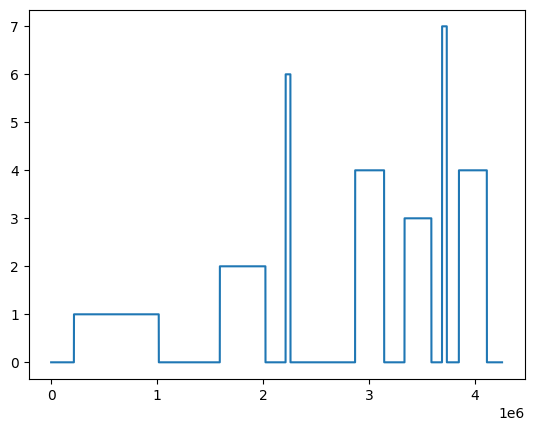

In [20]:
import matplotlib.pyplot as plt

plt.plot(s2['label'])

In [27]:
y2

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0]

In [25]:
len(s2['label'][(s2['label']==2) | (s2['label']==3) | (s2['label']==1) ])

1484700

In [13]:
len(y2)

71

In [100]:
#%pprint
#from pprint import pprint as print

#print(WESAD_cm_cr_dict['cr'])

import json
#ling = json.dumps(,sort_keys=True)

for i in WESAD_cm_cr_dict["cm"]:
    print('confusion matrix\n',i['Confusion Matrix'])
    #print(WESAD_cm_cr_dict["cr"][i],sep='\n' )


confusion matrix
 [[101   3   0]
 [  2 387   0]
 [  0   0 178]]
confusion matrix
 [[ 46  56   2]
 [  0 388   1]
 [  0   1 177]]
confusion matrix
 [[ 84  17   3]
 [ 21 366   2]
 [  2   0 176]]
confusion matrix
 [[ 88  12   4]
 [ 13 373   3]
 [  1   7 170]]
confusion matrix
 [[ 38  66   0]
 [ 49 340   0]
 [  0  52 126]]
confusion matrix
 [[ 91  13   0]
 [ 18 370   1]
 [  0   1 177]]


In [13]:
import numpy as np

In [14]:
np.diag(WESAD_cm_cr_dict["cm"][1]['Confusion Matrix'])  

array([ 46, 388, 177])